In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
df = pd.read_csv("Heart-Disease-Dataset.csv")
df

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_sugar      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    object 
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(11), 

There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

### No Missing Values in Data

In [16]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_sugar        0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [17]:
pd.set_option('display.max_columns',None)

In [18]:
pd.set_option('display.max_rows',None)

In [19]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [20]:
def chest_pain(row):
    if row==1:
        return 'Typical Angina'
    elif row==2:
        return 'Atypical Angina'
    elif row==3:
        return 'Non-Anginal pain'
    elif row==4:
        return 'Asymptomatic'

In [21]:
df['Chest_Pain']=df['chest_pain_type'].apply(chest_pain)

### Data Imbalance Check

In [22]:
target=df.groupby('target').size()
target

target
0    164
1     55
2     36
3     35
4     13
dtype: int64

In [23]:
def heart_disease(series):
    if series==0:
        return 'Absent'
    elif series==1:
        return 'Present'

In [24]:
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Typical Angina,Absent
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Asymptomatic,None
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Asymptomatic,Present
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Non-Anginal pain,Absent
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Atypical Angina,Absent


<Axes: >

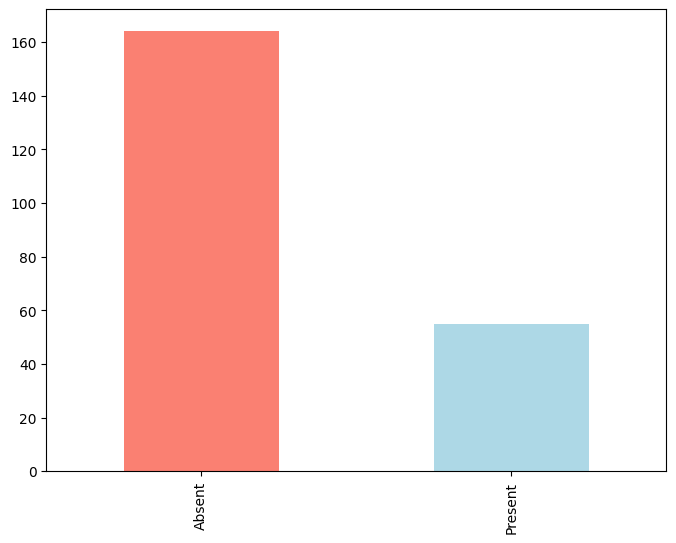

In [25]:
df['Heart_Disease'].value_counts().plot(kind='bar', figsize=(8, 6), color=["salmon","lightblue"])


In [26]:
hd=df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absent     164
Present     55
Name: target, dtype: int64

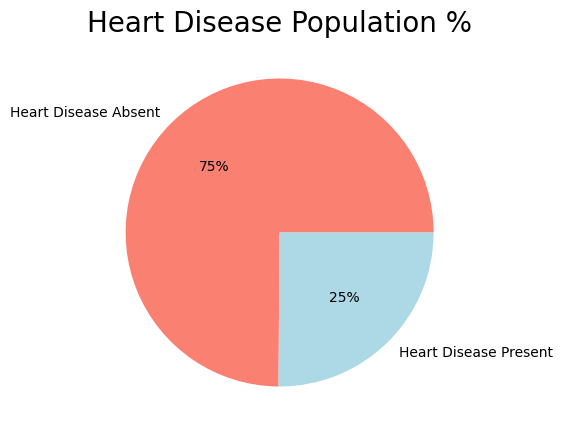

In [29]:
plt.figure(figsize=(10,5))
plt.pie(hd, labels=['Heart Disease Absent','Heart Disease Present'],colors=['salmon','lightblue'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

### Heart Disease Frequency According to Sex

In [30]:
df.sex.value_counts()

1    206
0     97
Name: sex, dtype: int64

In [31]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,72,92
1,9,46
2,7,29
3,7,28
4,2,11


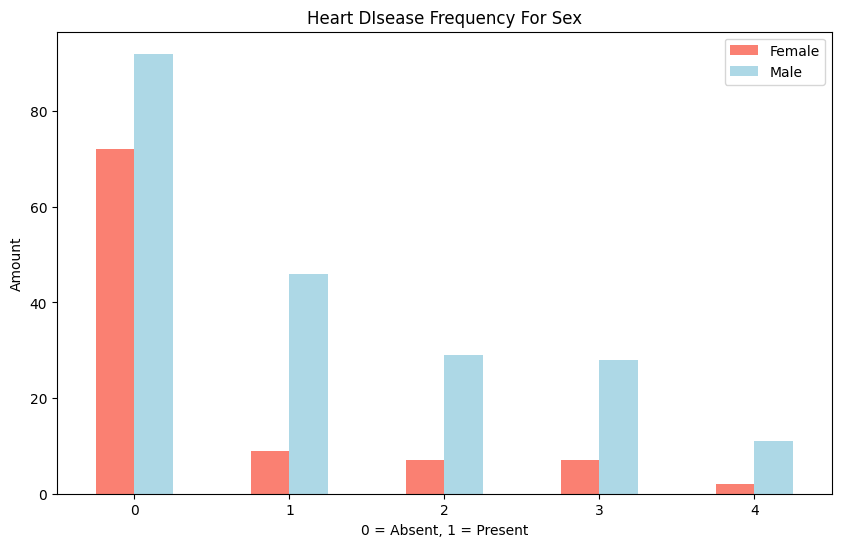

In [32]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart DIsease Frequency For Sex")
plt.xlabel("0 = Absent, 1 = Present")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Outlier Treatment

#### To check and remove outliers in *Numerical* Variables

In [33]:
df['age'].describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

<Axes: >

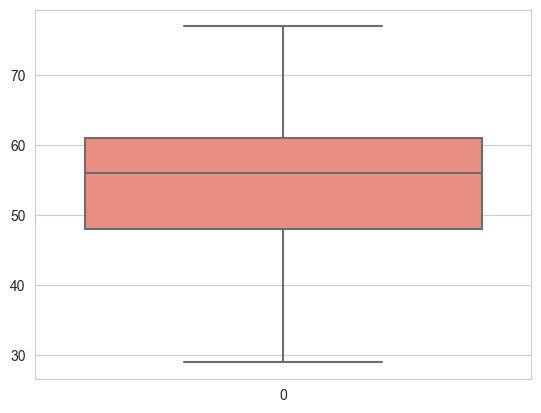

In [34]:
sns.set_style("whitegrid")

sns.boxplot(data=df['age'],color='salmon')

###### -> One analysis can be dividing the age into elderly, middle-aged, young people according to different age range.

In [35]:
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [36]:
Young=df[(df['age']>=29) & (df['age']<40)]
Middle_Aged=df[(df['age']>=40) & (df['age']<55)]
Elderly=df[(df['age']>55)]
print('Young =',len(Young))
print('Middle Aged =',len(Middle_Aged))
print('Elderly =',len(Elderly))

Young = 15
Middle Aged = 128
Elderly = 152


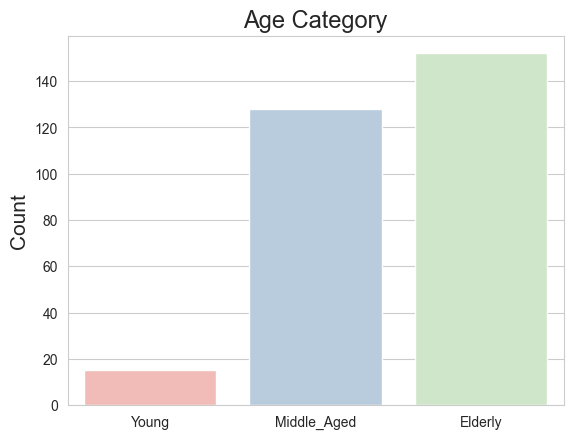

In [37]:
sns.barplot(x=['Young','Middle_Aged','Elderly'], y=[len(Young), len(Middle_Aged), len(Elderly)], palette='Pastel1')
plt.title('Age Category', fontsize=17)
plt.ylabel('Count', fontsize=15)
plt.show()

In [38]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'


In [39]:
df['sex1']=df['sex'].apply(gender)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Typical Angina,Absent,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Asymptomatic,None,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Asymptomatic,Present,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Non-Anginal pain,Absent,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Atypical Angina,Absent,Female


In [40]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young'
    elif row>=40 and row<55:
        return 'Middle Aged'
    elif row>55:
        return 'Elderly'

In [41]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Typical Angina,Absent,Male,Elderly
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Asymptomatic,None,Male,Elderly
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Asymptomatic,Present,Male,Elderly
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Non-Anginal pain,Absent,Male,Young
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Atypical Angina,Absent,Female,Middle Aged


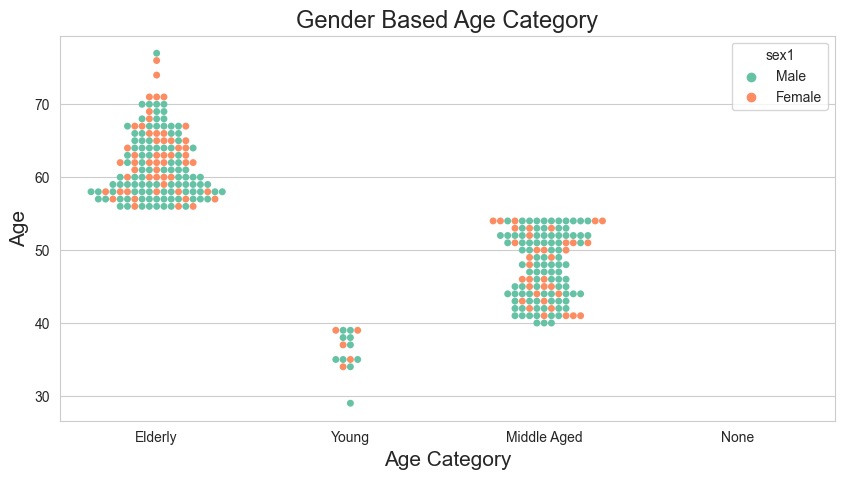

In [43]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=df, palette='Set2')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

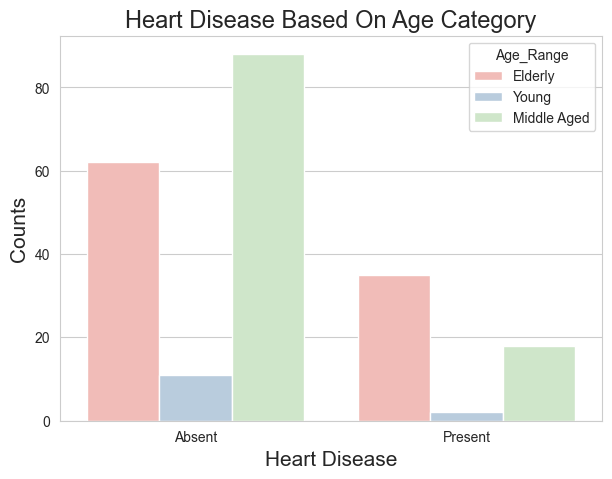

In [44]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=df,  palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In [45]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'Chest_Pain',
       'Heart_Disease', 'sex1', 'Age_Range'],
      dtype='object')

In [46]:
df['resting_blood_sugar'].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_blood_sugar, dtype: float64

<Axes: >

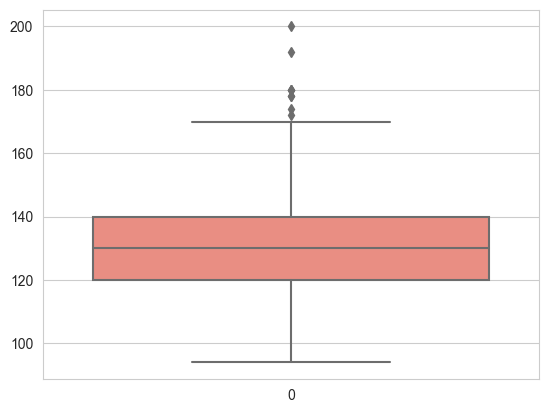

In [47]:
sns.boxplot(data=df['resting_blood_sugar'],color='salmon')

<Axes: >

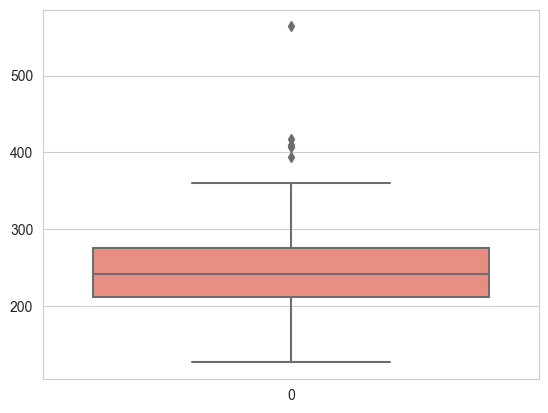

In [48]:
sns.boxplot(data=df['cholesterol'],color='salmon')

<Axes: >

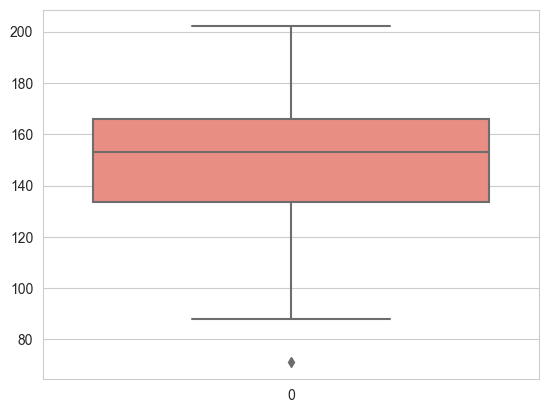

In [49]:
sns.boxplot(data=df['max_heart_rate_achieved'],color='salmon')

<Axes: >

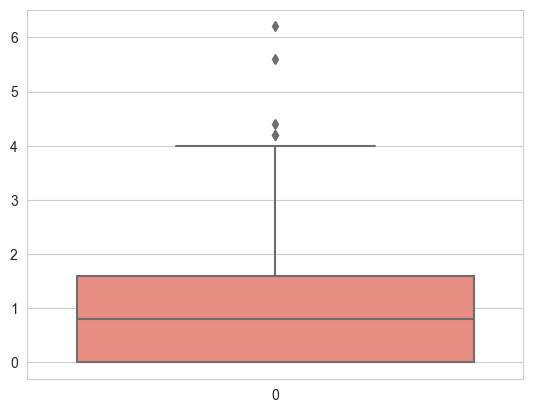

In [50]:
sns.boxplot(data=df['st_depression'],color='salmon')

## From the box plots we can see there are Outliers in st_depression, max_heart_rate_achieved, resting_blood_sugar and cholesterol in these variables. So lets drop the outlier value and replace the outlier using IQR.

In [51]:
df1=df.copy()

In [52]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [53]:
low_chol, upp_chol = remove_outlier(df1['cholesterol'])
low_chol
df1['cholesterol'] = np.where(df1['cholesterol']>upp_chol, upp_chol, df1['cholesterol'])
df1['cholesterol'] = np.where(df1['cholesterol']<low_chol, low_chol, df1['cholesterol'])

<Axes: xlabel='cholesterol'>

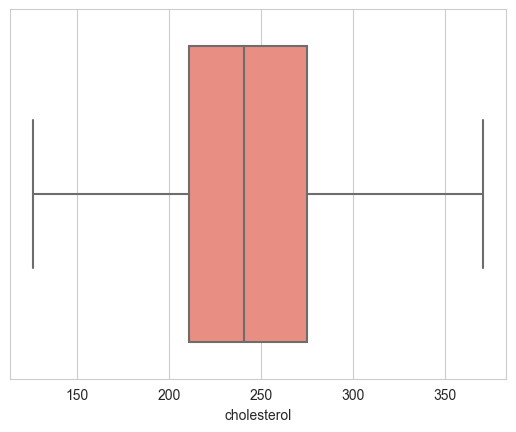

In [54]:
sns.boxplot(x = 'cholesterol', data = df1,color='salmon')

In [55]:
low_depr, upp_depr = remove_outlier(df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']>upp_depr, upp_depr, df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']<low_depr, low_depr, df1['st_depression'])

<Axes: xlabel='st_depression'>

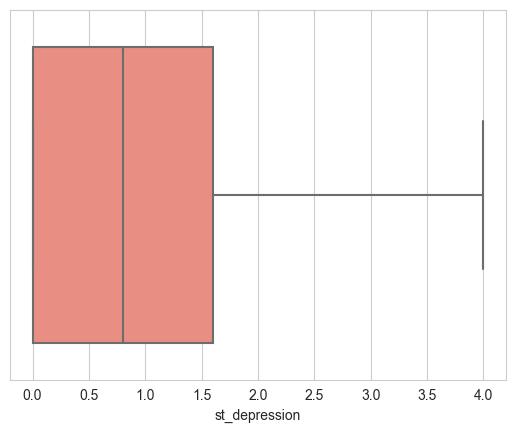

In [56]:
sns.boxplot(x = 'st_depression', data = df1,color='salmon')

In [57]:
low_hrate, upp_hrate = remove_outlier(df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']>upp_hrate, upp_hrate, df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']<low_hrate, low_hrate, df1['max_heart_rate_achieved'])

<Axes: xlabel='max_heart_rate_achieved'>

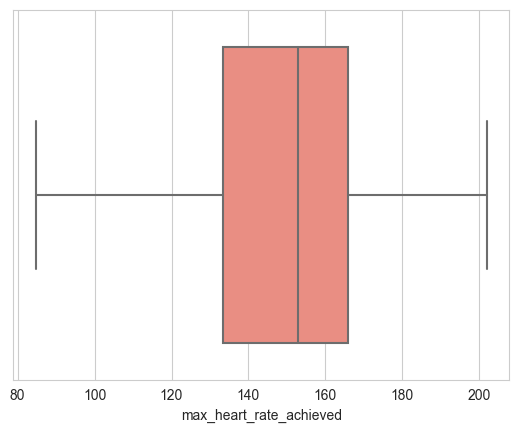

In [58]:
sns.boxplot(x = 'max_heart_rate_achieved', data = df1,color='salmon')

In [59]:
low_rbs, upp_rbs = remove_outlier(df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']>upp_rbs, upp_rbs, df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']<low_rbs, low_rbs, df1['resting_blood_sugar'])

<Axes: xlabel='resting_blood_sugar'>

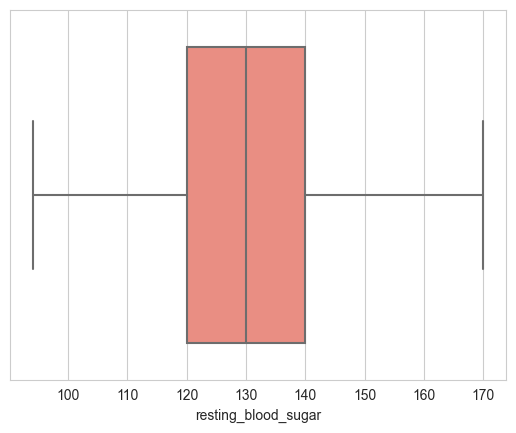

In [60]:
sns.boxplot(x = 'resting_blood_sugar', data = df1,color='salmon')

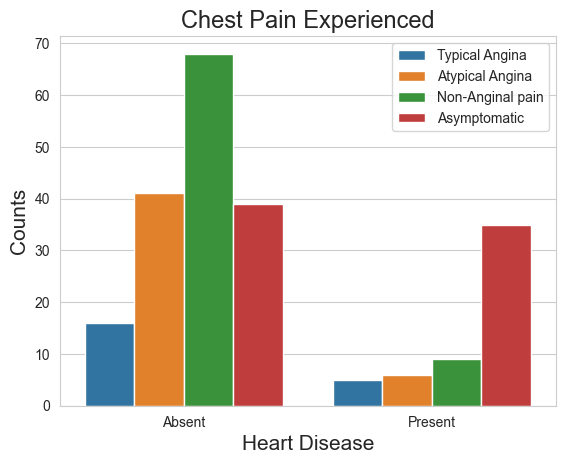

In [61]:
##Count Plot Creation of Chest Pain Experienced
%matplotlib inline
sns.countplot(x=df1['Heart_Disease'], hue='chest_pain_type', data=df1)
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

In [62]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'Chest_Pain',
       'Heart_Disease', 'sex1', 'Age_Range'],
      dtype='object')

###### -> It seems people having asymptomatic chest pain have a higher chance of heart disease

###### -> Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

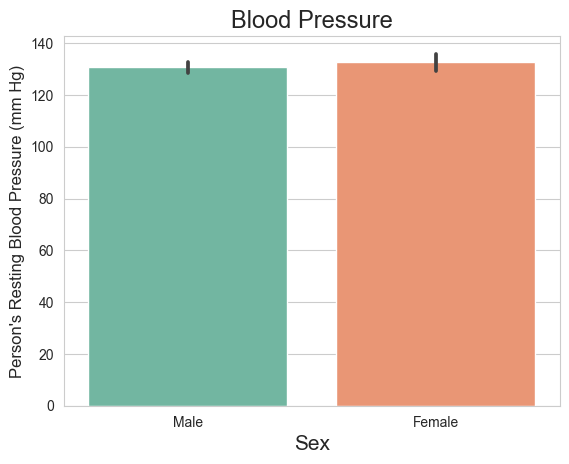

In [63]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg)

sns.barplot(x='sex1', y='resting_blood_sugar', data=df1, palette='Set2')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

###### -> Blood Pressure Rate is almost equal in Males and Females

<Axes: ylabel='bins'>

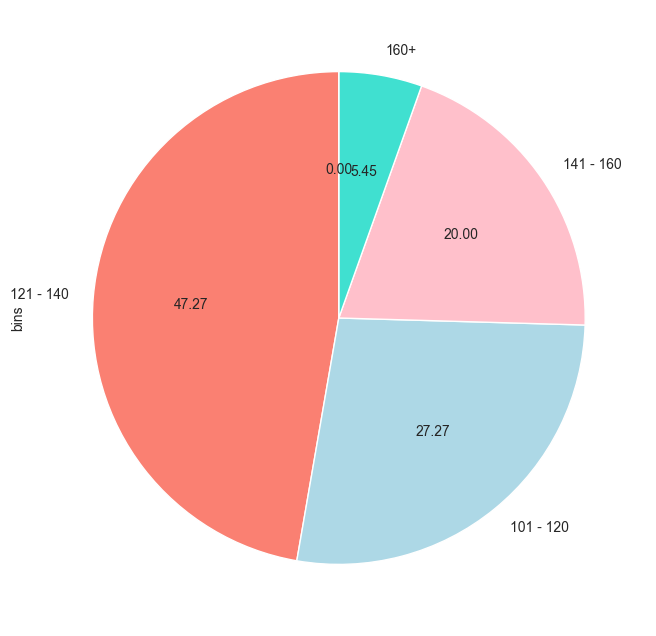

In [64]:
df1['bins'] = pd.cut(df1['resting_blood_sugar'],bins=[0,100,120,140,160,180], labels=["0 - 100","101 - 120","121 - 140","141 - 160","160+"])
plt.figure(figsize=(8,8))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["salmon","lightblue","pink","turquoise","lightgreen"],startangle=90,fontsize=10)

### Patients having resting blood sugar(diastolic state) <90mm Hg in diastolic state have less chances of heart disease

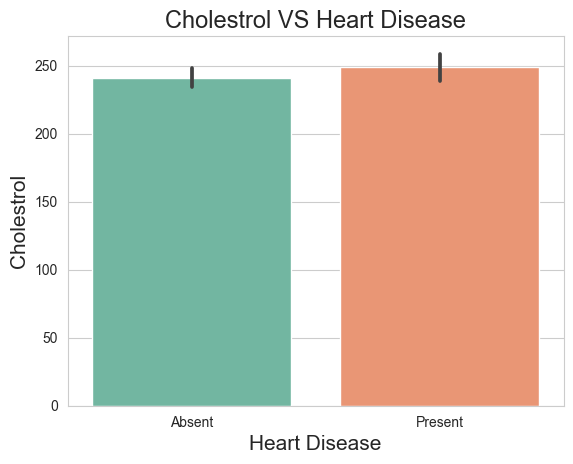

In [65]:
#Bar Plot Creation of Cholestrol VS Heart Disease

sns.barplot(x='Heart_Disease', y='cholesterol', data=df1, palette='Set2')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Higher Cholestrol Level results Chances Of Heart Disease

Text(0.0, 1.0, 'Cholestrol details against target\n')

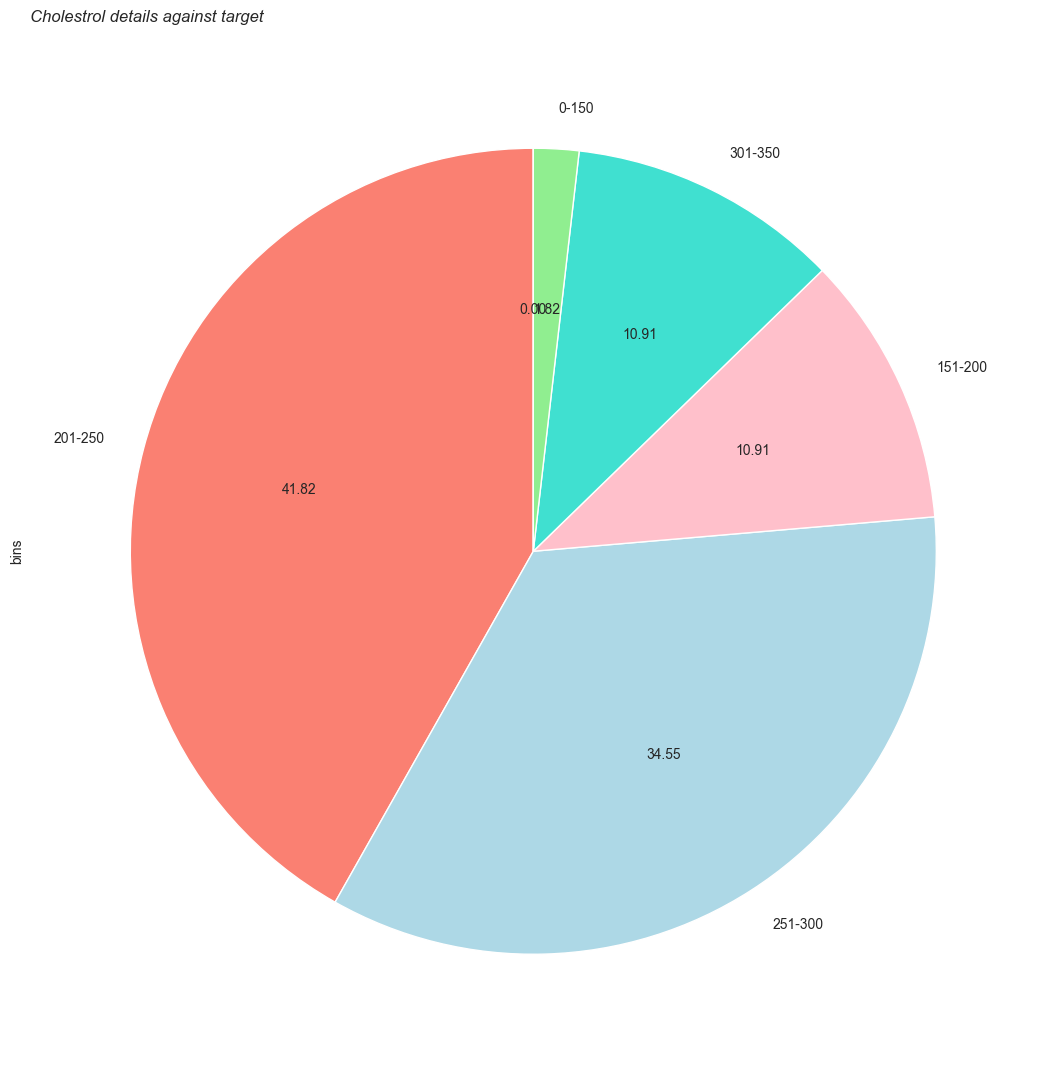

In [66]:
df1['bins'] = pd.cut(df1['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(13,14))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["salmon","lightblue","pink","turquoise","lightgreen"],startangle=90,fontsize=10)
plt.title(label="Cholestrol details against target\n",loc="left",fontstyle='italic')

### Patients having cholesterol level between 200 to 300 mg/dl have higher chances of having heart disease.

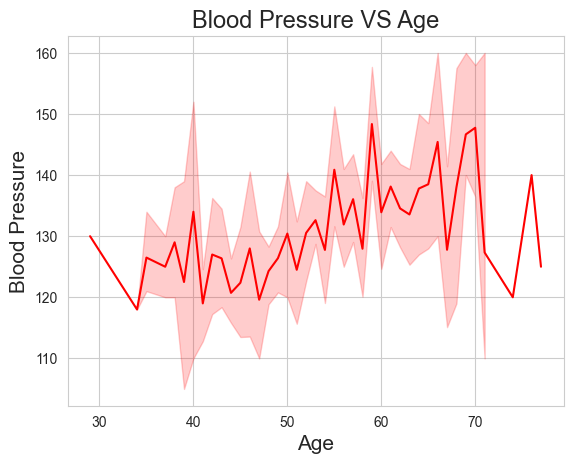

In [67]:
#Line Plot Creation of Blood Pressure VS Age

sns.lineplot(x='age', y='resting_blood_sugar', data=df1, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

######  Blood Pressure increases between age of 50 to 60 and continues the pattern till 70.

C:\Users\MIHIR\AppData\Local\Temp\ipykernel_11112\353495747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


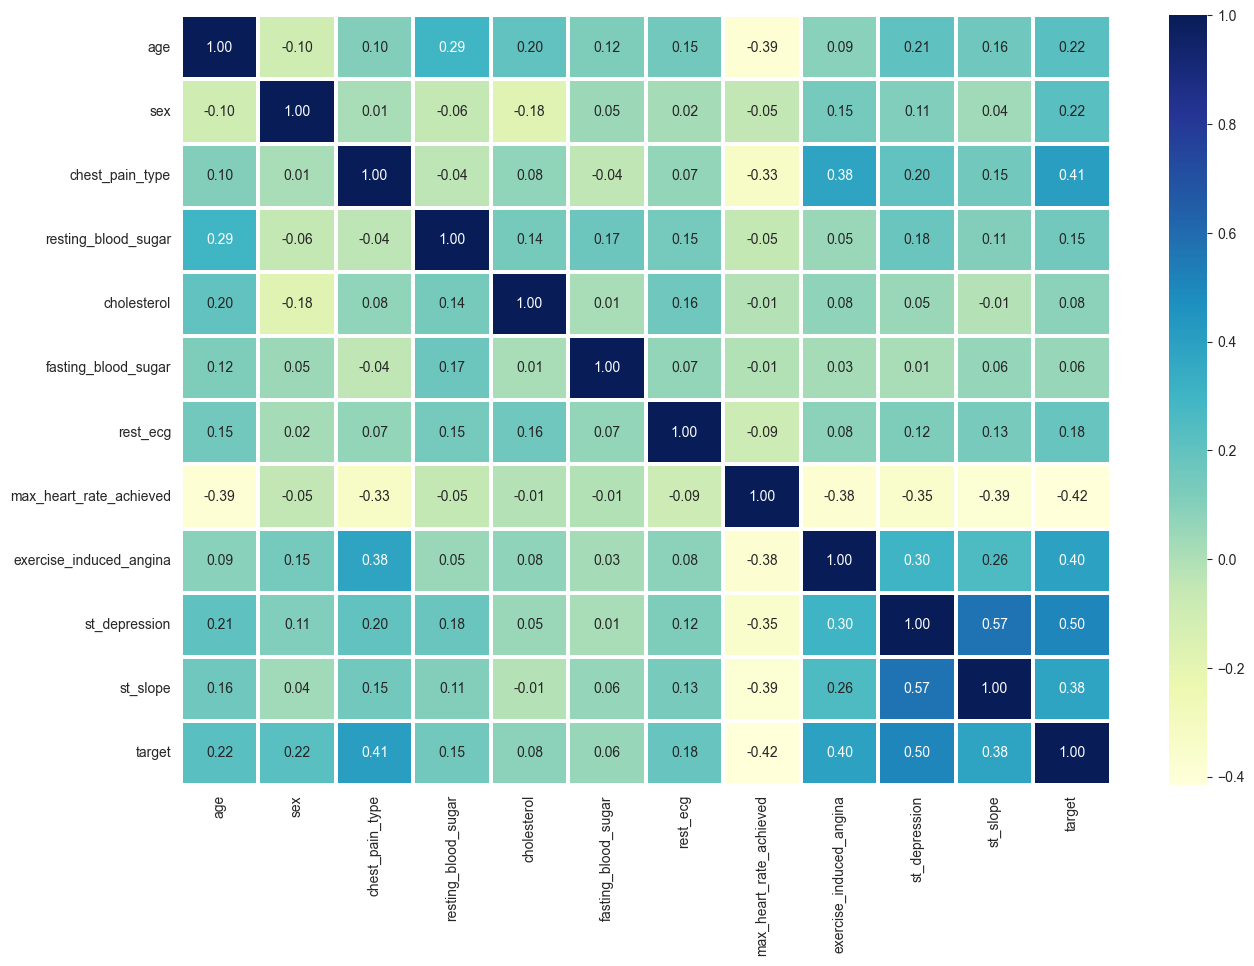

In [68]:
corr_matrix = df1.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=1.5,
                fmt=".2f",
                cmap="YlGnBu");

Text(0.5, 1.0, 'Max Heart Rate achieved v/s Age \n')

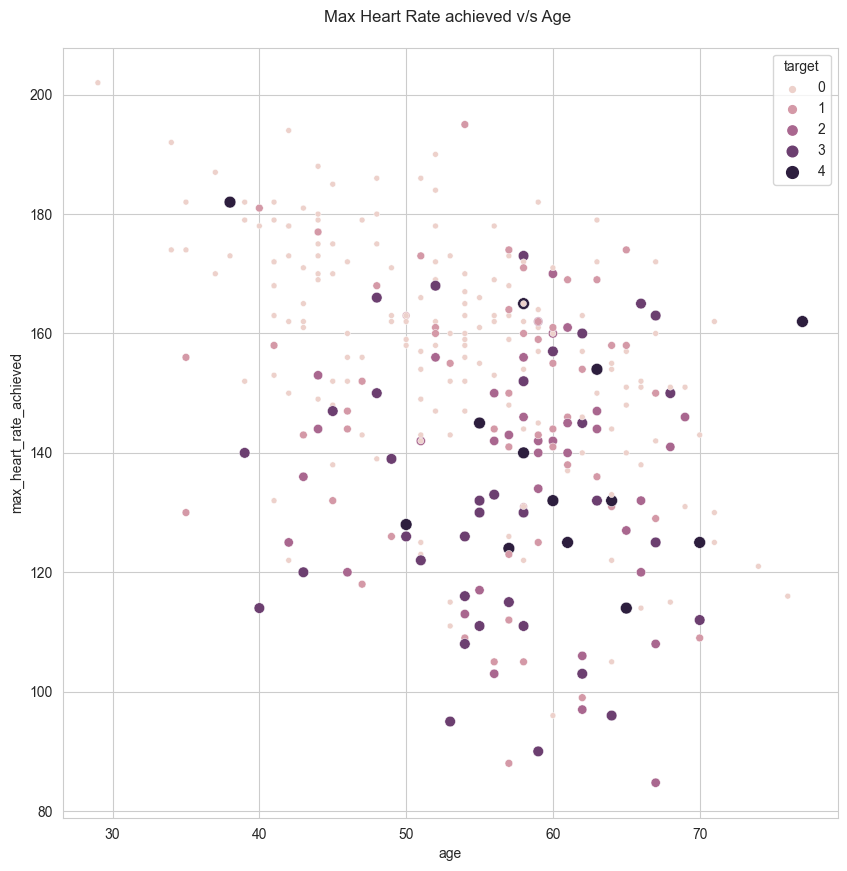

In [69]:
# Observable from the heatmap above that there is a correlation between age and max_heart_rate_achieved with negative correlation of -0.39
plt.figure(figsize = (10, 10))
sns.scatterplot(x='age', y='max_heart_rate_achieved',hue='target',data=df1,size='target')
plt.title("Max Heart Rate achieved v/s Age \n")

### There are more number of people suffering form Heart Disease, between the age 55-65 and have Heart Rate between 140-160.

Text(0.5, 1.0, 'Cholesterol v/s Age \n')

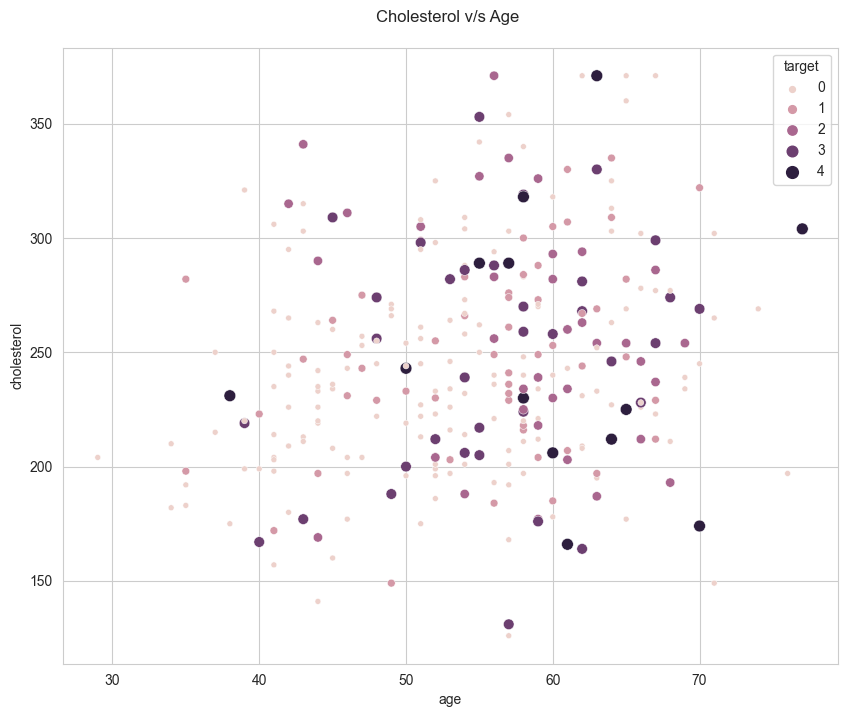

In [70]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='cholesterol',hue='target',data=df1,size='target')
plt.title("Cholesterol v/s Age \n")

### Most of the people suffering from Heart Disease are above 50 and their Cholesterol Level ranges between 200-350.
### People with age<40  have low cholesterol level

Text(0.5, 1.0, 'max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n')

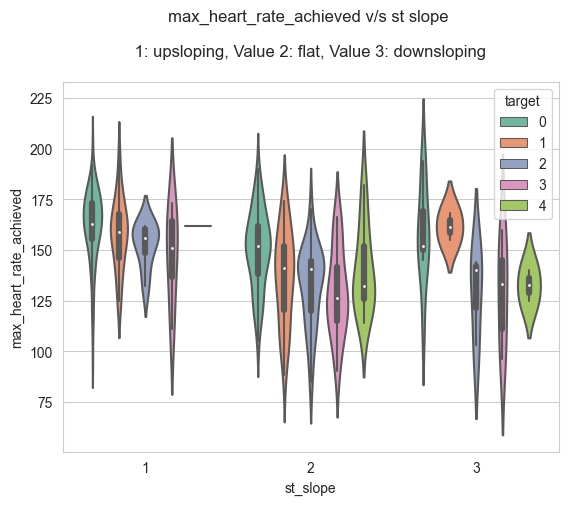

In [71]:
ax = sns.violinplot(x="st_slope", y="max_heart_rate_achieved", hue="target",data=df1, palette="Set2")
plt.title("max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n")

### People suffering from Heart Disease, have max heart rate ranging between 120-170 and have downsloping meaning the signs of an unhealthy heart.

In [58]:
df.to_csv('Heart Disease Diagnostic.csv', sep='\t')